# ExoJulia
## Andrew Lincowski & Spencer Wallace
## Homework 4: TTV MCMC

In [1]:
# Required packages
using LsqFit
using PyPlot
include("../compute_ttv.jl")
include("../ttv_succinct.jl")

ttv_succinct! (generic function with 1 method)

In [2]:
# Load transit timing data
data1 = readdlm("../ttv_planet1.txt")[:,1]
data2 = readdlm("../ttv_planet2.txt")[:,1]

24-element Array{Float64,1}:
  8461.76
  8827.02
  9192.27
  9557.53
  9922.79
 10288.0 
 10653.3 
 11018.6 
 11383.8 
 11749.1 
 12114.3 
 12479.6 
 12844.8 
 13210.1 
 13575.4 
 13940.6 
 14305.9 
 14671.1 
 15036.4 
 15401.6 
 15766.9 
 16132.1 
 16497.4 
 16862.7 

In [3]:
# Initiate ttv arrays
ttv1 = zeros(Float64,length(data1))
ttv2 = zeros(Float64,length(data2))

24-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [4]:
#compute_ttv!(jmax::Integer,p1::Planet_plane_hk,p2::Planet_plane_hk,time1::Vector,time2::Vector,ttv1::Vector,ttv2::Vector)
jmax = 15
pl1 = TTVFaster.Planet_plane_hk{Float64}(0.05,3.5,1.0,0.1,0.4)
pl2 = TTVFaster.Planet_plane_hk{Float64}(0.05,15,1.0,0.1,0.1)
TTVFaster.compute_ttv!(jmax,pl1,pl2,data1,data2,ttv1,ttv2)

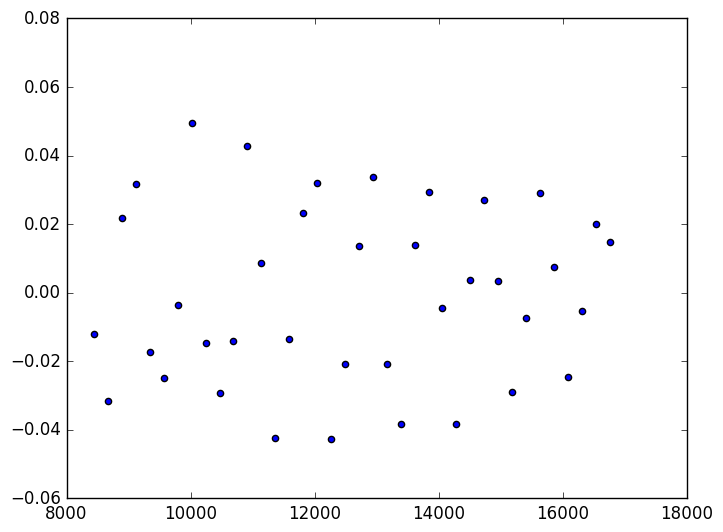

PyObject <matplotlib.collections.PathCollection object at 0x7ff5bf741e10>

In [5]:
# Plot TTV vs time
scatter(data1,ttv1)
#scatter(data2,ttv2)

## 1. Create wrapper for compute TTV which calls N(N-1) pairs of planets to compute the TTV of each planet due to all the others.

In [6]:
# Testing ttv loop

# Initialize necessary varibles
N = 2
len_arr = max(length(data1),length(data2))
pl = Array(TTVFaster.Planet_plane_hk{Float64},N)
pl[1] = TTVFaster.Planet_plane_hk{Float64}(0.1,1.0,1.05,1.0,1.0)
pl[2] = TTVFaster.Planet_plane_hk{Float64}(0.2,1.68,1.0,1.0,1.0)

# Using linked lists for data
data = []
push!(data,data1)
push!(data,data2)
ttv_data = []

for i in 1:N
    push!(ttv_data,[zeros(Float64,length(data[i]),N)])
end

ttv_total = []

for i in 1:N
    push!(ttv_total,[zeros(Float64,length(data[i]))])
end

# Compute TTV

# Non-loop example
TTVFaster.compute_ttv!(2,pl[1],pl[2],data[1],data[2],ttv1,ttv2)
#TTVFaster.compute_ttv!(jmax,pl1,pl2,data1,data2,ttv1,ttv2)

# Loop example
# Do we need data on each planet pair TTV saved?
for i in 1:N
    for j in (i+1):N
        ttv_temp1 = ttv_data[i][:,j]
        ttv_temp2 = ttv_data[j][:,i]
        TTVFaster.compute_ttv!(2,pl[i],pl[j],data[i],data[j],ttv_temp1,ttv_temp2)
        ttv_data[i][:,j] = ttv_temp1
        ttv_data[j][:,i] = ttv_temp2
        ttv_total[i] .+= ttv_temp1
        ttv_total[j] .+= ttv_temp2
    end
end
TTVFaster.compute_ttv!(2,pl[1],pl[2],data[1],data[2],ttv1,ttv2)

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[6]:17
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[6], in expression starting on line 16
 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[6]:17
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[6], in expression starting on line 16
 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[6]:23
 in anonymous at no file:0
 in include_string at load

In [7]:
#ttv_data[planet from list][planet array: transits rows, pl cols]
ttv_data[2][:,1] - ttv2

24-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

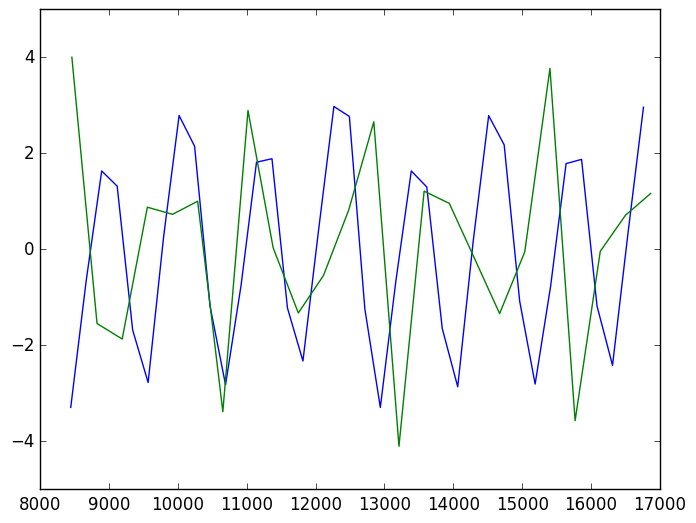

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f36beb45050>

In [8]:
plot(data[1],ttv_data[1][:,2])
plot(data[2],ttv_data[2][:,1])

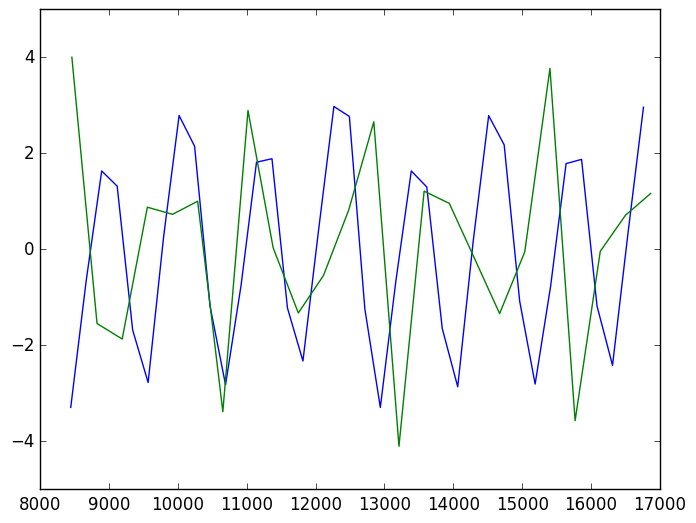

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f36bebf0950>

In [9]:
plot(data1,ttv_total[1])
plot(data2,ttv_total[2])

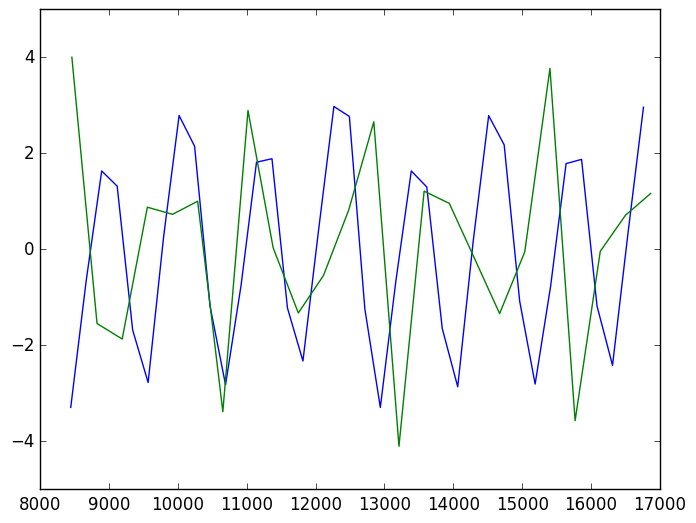

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f36ba2afe90>

In [10]:
plot(data1,ttv1)
plot(data2,ttv2)

In [7]:
ttv_total = []

for i in 1:N
    push!(ttv_total,[zeros(Float64,length(data[i]))])
end

for i in 1:N
    for j in ()
    ttv_total[i] = sum(ttv_data[i])
end


 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[7]:4
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[7], in expression starting on line 3
 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[7]:4
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[7], in expression starting on line 3


LoadError: LoadError: syntax: incomplete: "for" at In[7]:7 requires end
while loading In[7], in expression starting on line 7

In [8]:
ttv_total[1]

38-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
length(ttv_total[1]), length(ttv_total[2])

(38,24)

In [10]:
# Testing ttv loop w/3rd non-transiting planet

# Initialize necessary varibles
N = 4
pl = Array(TTVFaster.Planet_plane_hk{Float64},N)
pl[1] = TTVFaster.Planet_plane_hk{Float64}(0.1,1.0,1.05,1.0,1.0)
pl[2] = TTVFaster.Planet_plane_hk{Float64}(0.2,1.68,1.0,1.0,1.0)
pl[3] = TTVFaster.Planet_plane_hk{Float64}(0.2,2.23,0.0,1.0,1.0)
pl[4] = TTVFaster.Planet_plane_hk{Float64}(0.2,2.65,0.0,1.0,1.0)

# Using linked lists for data
data = []
push!(data,data1)
push!(data,data2)
push!(data,[0.0,1.0,2.0])
push!(data,[0.0,1.0,2.0])
ttv_data = []

for i in 1:N
    #push!(ttv_data,[zeros(Float64,length(data[i]),N)])
    ttv_data = hcat(ttv_data,[zeros(Float64,length(data[i]),N)])
end

ttv_total = []

for i in 1:N
    push!(ttv_total,[zeros(Float64,length(data[i]))])
end

# Compute TTV

# Non-loop example
#TTVFaster.compute_ttv!(2,pl[1],pl[2],data[1],data[2],ttv1,ttv2)
#TTVFaster.compute_ttv!(jmax,pl1,pl2,data1,data2,ttv1,ttv2)

# Loop example
# Do we need data on each planet pair TTV saved?
jmax = 10
for i in 1:N
    for j in (i+1):N
        ttv_temp1 = zeros(Float64,length(ttv_data[i][:,j]))
        ttv_temp2 = zeros(Float64,length(ttv_data[j][:,i]))
        TTVFaster.compute_ttv!(jmax,pl[i],pl[j],data[i],data[j],ttv_temp1,ttv_temp2)
        ttv_data[i][:,j] = ttv_temp1
        ttv_data[j][:,i] = ttv_temp2
        ttv_total[i] .+= ttv_temp1
        ttv_total[j] .+= ttv_temp2
        println(i,", ",j," ",ttv_temp1[1]," ",ttv_temp2[1])
    end
end
#TTVFaster.compute_ttv!(2,pl[1],pl[2],data[1],data[2],ttv1,ttv2)

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[10]:21
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 19


LoadError: LoadError: ArgumentError: number of rows of each array must match (got (0,38))
while loading In[10], in expression starting on line 19

In [15]:
ttv_total[3]

3-element Array{Float64,1}:
 -560.872
 -351.473
 -339.241

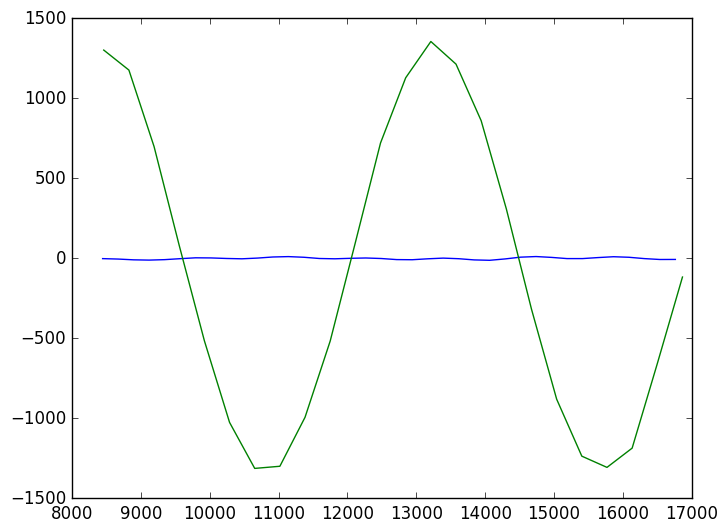

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f36ba126e50>

In [16]:
plot(data1,ttv_total[1])
plot(data2,ttv_total[2])

In [17]:
#ttv_data[planet from list][planet array: transits rows, pl cols]
ttv_data[1][:,3]

38-element Array{Float64,1}:
  4.44553 
  0.379429
 -4.4821  
 -4.16338 
  0.590705
  4.81374 
  3.58366 
 -1.65036 
 -4.90693 
 -3.01617 
  2.62695 
  5.36417 
  2.72538 
  ⋮       
 -3.67385 
  2.0534  
  5.47341 
  3.76765 
 -1.75192 
 -4.82123 
 -2.37505 
  2.39534 
  4.50077 
  1.00881 
 -3.58404 
 -4.40918 

In [53]:
plot(data[1],ttv_data[1][:,2])
plot(data[2],ttv_data[2][:,1])

LoadError: LoadError: BoundsError: attempt to access 0-element Array{Any,1}
  at index [1]
while loading In[53], in expression starting on line 1

In [19]:
ttv_data[1][5,2] + ttv_data[1][5,3], ttv_total[1][5]

(-7.839959623099851,-7.5240571527629845)

In [20]:
ttv_total[3]

3-element Array{Float64,1}:
 -560.872
 -351.473
 -339.241

In [21]:
ttv_data[1][:,2]

38-element Array{Float64,1}:
 -4.44372 
 -3.30942 
 -3.8186  
 -6.23037 
 -8.43066 
 -6.56209 
  0.51703 
  5.53271 
  5.58693 
  1.55943 
 -0.148871
  3.43237 
  7.92165 
  ⋮       
  1.06438 
  6.0803  
  5.955   
  2.10925 
  0.146462
  3.49691 
  7.79542 
  8.70216 
  3.62413 
 -1.20439 
 -2.34592 
 -1.71042 

In [107]:
# Find approximate period from transit data
sum1 = 0.0
sum1a = 0.0
sum2 = 0.0
sum2a = 0.0
for i in 1:(length(data1)-1)
    sum1 += data1[i+1] - data1[i]
end

Per1 = sum1 / (length(data1)-1)

for i in 1:(length(data1)-1)
    sum1a += (data1[i+1] - data1[i] - per1)^2
end

for i in 1:(length(data2)-1)
    sum2 += data2[i+1] - data2[i]
end


Per2 = sum2 / (length(data2)-1)

for i in 1:(length(data2)-1)
    sum2a += (data2[i+1] - data2[i] - per2)^2
end

Stdev1 = sqrt(sum1a/(length(data1)-1))
Stdev2 = sqrt(sum2a/(length(data2)-1))

Per1,Per2,Stdev1,Stdev2

(224.70076641863517,365.25630708152175,0.0022543542095608466,0.0021310026275067444)

In [140]:
function timing_model(x,p)
    # check for bad parameters
    if((p[1] <= 0. || p[1] > 1.) || (p[6] <= 0. || p[6] > 1.))
        return -9999#typemax(Float64) 
#    elseif(p[2] <= 0. || p[7] <= p[2])
    elseif(p[2] < Per1 - 2*Stdev1 || p[2] > Per1 + 2*Stdev1 ||
        p[7] < Per2 - 2*Stdev2 || p[7] > Per2 + 2*Stdev2)
        return -9999#typemax(Float64)
    elseif(p[4] == 0.0 || p[5] == 0.0 || p[9] == 0.0 || p[10] == 0.0)
        return -9999#typemax(Float64)
    elseif(p[4] >= 1.0 || p[5] >= 1.0 || p[9] >= 1.0 || p[10] >= 1.0)
        return -9999#typemax(Float64)   
    elseif(p[4] <= -1.0 || p[5] <= -1.0 || p[9] <= -1.0 || p[10] <= -1.0)
        return -9999#typemax(Float64) 
    end
    #println(p)
    x1 = x[1:38]
    x2 = x[39:end]
    
    # Initialize necessary varibles
    N = 2
    pl = Array(TTVFaster.Planet_plane_hk{Float64},N)
    pl[1] = TTVFaster.Planet_plane_hk{Float64}(p[1],p[2],p[3],p[4],p[5])
    pl[2] = TTVFaster.Planet_plane_hk{Float64}(p[6],p[7],p[8],p[9],p[10])

    # Using linked lists for data
    #data = []
    #push!(data,x1*p[2])
    #push!(data,(x2-x1[38])*p[7])
    #ttv_data = []
    data = Any[x1*p[2],(x2-x1[38])*p[7]]

  #  for i in 1:N
   #     push!(ttv_data,[zeros(Float64,length(x1),N)])
   # end
    #push!(ttv_data,[zeros(Float64,length(x1),N)])
    #push!(ttv_data,[zeros(Float64,length(x1),N)])
    #push!(ttv_data,[zeros(Float64,length(x2),N)])
    ttv_data = Any[zeros(Float64,length(x1),N),zeros(Float64,length(x2),N)]
   
    #ttv_total = []

    #for i in 1:N
    #    push!(ttv_total,[zeros(Float64,length(x2))])
   # end
    
    #push!(ttv_total,[zeros(Float64,length(x1))])
    #push!(ttv_total,[zeros(Float64,length(x2))])
    ttv_total = Any[zeros(Float64,length(x1)),zeros(Float64,length(x2))]
    jmax = 8
    for i in 1:N
        for j in (i+1):N
            ttv_temp1 = zeros(Float64,length(ttv_data[i][:,j]))
            ttv_temp2 = zeros(Float64,length(ttv_data[j][:,i]))
            TTVFaster.compute_ttv!(jmax,pl[i],pl[j],data[i],data[j],ttv_temp1,ttv_temp2)
            ttv_data[i][:,j] = ttv_temp1
            ttv_data[j][:,i] = ttv_temp2
            ttv_total[i] .+= ttv_temp1
            ttv_total[j] .+= ttv_temp2
            #println(i,", ",j," ",ttv_temp1[1]," ",ttv_temp2[1])
        end
    end
    
    data[1] .+= ttv_total[1]
    data[2] .+= ttv_total[2]
    
    retarr = collect([data[1],data[2]])
    return retarr
    
end



#p = [massr1,period1,t01,ecosw1,esinw1,massr2,period2,t02,ecosw2,esinw2]
p = [1e-6,Per1,data1[1],0.5,0.5,1e-6,Per2,data2[1],0.5,0.5]
y = collect([data1,data2])
x = collect(linspace(1,length(y),length(y)))
errorbars = Array(Float64,length(y))
errorbars[:] = 30.0/86400.0
newdata = timing_model(x,p)
fit = curve_fit(timing_model,x,y,errorbars,p)
fit.param

10-element Array{Float64,1}:
    1.00007e-6
  224.704     
 8445.5       
    0.500189  
    0.500174  
    1.00007e-6
  365.259     
 8461.76      
    0.499742  
    0.499756  

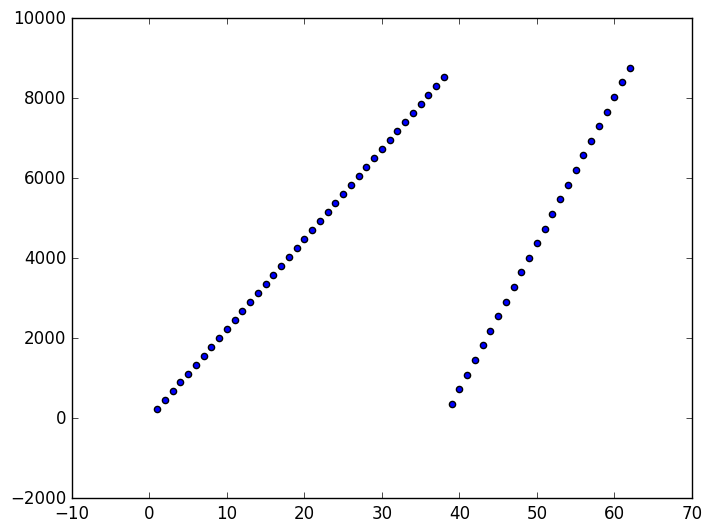

PyObject <matplotlib.collections.PathCollection object at 0x7ff5b8584ed0>

In [141]:
newdata = timing_model(x,fit.param)
scatter(x,newdata)

In [142]:
Fit = fit.param
function third_planet(x,p)
    # check for bad parameters
    if((p[1] <= 0. || p[1] > 1.) || (p[6] <= 0. || p[6] > 1.) || (p[11] <= 0. || p[11] > 1.))
        return -9999#typemax(Float64)
    elseif(p[2] <= 0. || p[7] <= p[2])
        return -9999#typemax(Float64)
    elseif(p[4] == 0.0 || p[5] == 0.0 || p[9] == 0.0 || p[10] == 0.0 || p[14] == 0.0 || p[15] == 0.0)
        return -9999#typemax(Float64)
    elseif(p[4] >= 1.0 || p[5] >= 1.0 || p[9] >= 1.0 || p[10] >= 1.0 || p[14] >= 1.0 || p[15] >= 1.0)
        return -9999#typemax(Float64)   
    elseif(p[4] <= -1.0 || p[5] <= -1.0 || p[9] <= -1.0 || p[10] <= -1.0 || p[14] <= -1.0 || p[15] <= -1.0)
        return -9999#typemax(Float64) 
    elseif(p[12] < Period3_0 || p[12] > Period3_1)
        return -9999#typemax(Float64) 
    end
    
    x1 = x[1:38]
    x2 = x[39:62]
    x3 = x[63:end]
    
    
    
    # Initialize necessary variables
    N = 3
    pl = Array(TTVFaster.Planet_plane_hk{Float64},N)
    pl[1] = TTVFaster.Planet_plane_hk{Float64}(p[1],p[2],p[3],p[4],p[5])
    pl[2] = TTVFaster.Planet_plane_hk{Float64}(p[6],p[7],p[8],p[9],p[10])
    pl[3] = TTVFaster.Planet_plane_hk{Float64}(p[11],p[12],p[13],p[14],p[15])

    # Using linked lists for data
    #data = []
    #push!(data,x1*p[2])
    #push!(data,(x2-x1[38])*p[7])
    #ttv_data = []
    data = Any[x1*p[2],(x2-x1[end])*p[7],(x3-x2[end])*p[12]]

  #  for i in 1:N
   #     push!(ttv_data,[zeros(Float64,length(x1),N)])
   # end
    #push!(ttv_data,[zeros(Float64,length(x1),N)])
    #push!(ttv_data,[zeros(Float64,length(x1),N)])
    #push!(ttv_data,[zeros(Float64,length(x2),N)])
    ttv_data = Any[zeros(Float64,length(x1),N),zeros(Float64,length(x2),N),zeros(Float64,length(x3),N)]
   
    #ttv_total = []

    #for i in 1:N
    #    push!(ttv_total,[zeros(Float64,length(x2))])
   # end
    
    #push!(ttv_total,[zeros(Float64,length(x1))])
    #push!(ttv_total,[zeros(Float64,length(x2))])
    ttv_total = Any[zeros(Float64,length(x1)),zeros(Float64,length(x2)),zeros(Float64,length(x3))]
    jmax = 10
    for i in 1:N
        for j in (i+1):N
            ttv_temp1 = zeros(Float64,length(ttv_data[i][:,j]))
            ttv_temp2 = zeros(Float64,length(ttv_data[j][:,i]))
            TTVFaster.compute_ttv!(jmax,pl[i],pl[j],data[i],data[j],ttv_temp1,ttv_temp2)
            ttv_data[i][:,j] = ttv_temp1
            ttv_data[j][:,i] = ttv_temp2
            ttv_total[i] .+= ttv_temp1
            ttv_total[j] .+= ttv_temp2
            #println(i,", ",j," ",ttv_temp1[1]," ",ttv_temp2[1])
        end
    end
    
    for i in 1:N    
        data[i] .+= ttv_total[i]
    end
    
    retarr = collect([data[1],data[2],data[3]])
    return retarr
    
end

Period3 = 4332.0
period3 = 4300.0
Period3_0 = period3
Period3_1 = period3 + 100.0
data3 = collect(linspace(p[2],p[2]+(10*Period3),10))
y = collect([data1,data2,data3])
x = collect(linspace(1,length(y),length(y)))

#p = [massr1,period1,t01,ecosw1,esinw1,massr2,period2,t02,ecosw2,esinw2]
p = [Fit,0.1,period3,data1[1],0.25,0.25]

errorbars = Array(Float64,length(y))
errorbars[:] = 30.0/86400.0
newdata2 = third_planet(x,p)
fit2 = curve_fit(third_planet,x,y,errorbars,p)
fit2.param

15-element Array{Float64,1}:
    1.02057e-6
  226.758     
 8445.51      
    0.821677  
    0.387945  
    1.02057e-6
  368.455     
 8461.82      
    0.999941  
    0.500656  
    0.193618  
 4300.0       
 8445.48      
    0.824876  
    0.310745  

In [45]:
p = [Fit,0.1,period3,data1[1],0.25,0.25]

15-element Array{Float64,1}:
    0.0987087 
  227.346     
 8436.54      
    0.263615  
    0.16505   
    9.63716e-6
  370.635     
 8475.23      
    0.219943  
    0.302799  
    0.1       
 4300.0       
 8445.5       
    0.25      
    0.25      

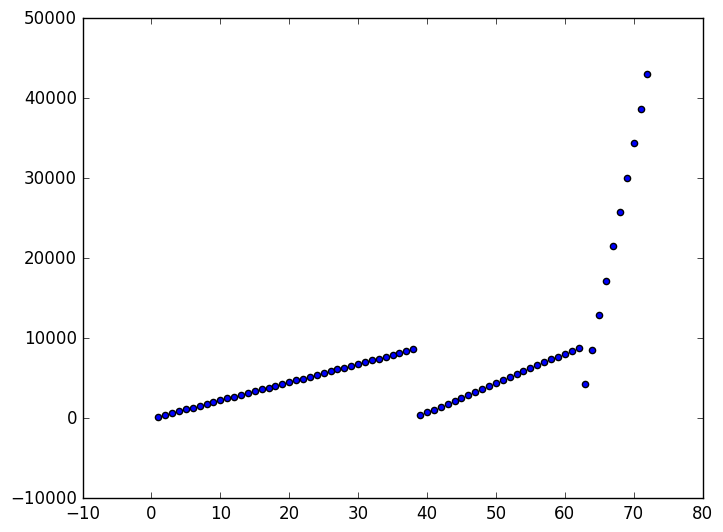

PyObject <matplotlib.collections.PathCollection object at 0x7ff5b84bff50>

In [143]:
#newdata = timing_model(x,fit.param)
newdata3 = third_planet(x,fit2.param)
scatter(x,newdata3)

In [41]:
linspace(1,length(y),length(y))

linspace(1.0,62.0,62)

In [59]:
z = collect([data1,data2])

62-element Array{Float64,1}:
  8445.5
  8670.2
  8894.9
  9119.6
  9344.3
  9569.0
  9793.7
 10018.4
 10243.1
 10467.8
 10692.5
 10917.2
 11141.9
     ⋮  
 12844.8
 13210.1
 13575.4
 13940.6
 14305.9
 14671.1
 15036.4
 15401.6
 15766.9
 16132.1
 16497.4
 16862.7

In [35]:
periods = collect(linspace(500.0,10000.0,95))

for i in periods
    Period3 = periods[i]
    #Period3 = 4332.0
    data3 = collect(linspace(p[2],p[2]+(10*Period3),10))
    y = collect([data1,data2,data3])
    x = collect(linspace(1,length(y),length(y)))

    p = [0.1,data1[1],0.25,0.25]

    errorbars = Array(Float64,length(y))
    errorbars[:] = 30.0/86400.0
    newdata2 = third_planet(x,p)
    fit2 = curve_fit(third_planet,x,y,errorbars,p)
    fit2.param
end

LoadError: LoadError: InterruptException:
while loading In[35], in expression starting on line 3

In [144]:
fit2.resid

72-element Array{Float64,1}:
 -2.85337  
 -2.85289  
 -2.85237  
 -2.85175  
 -2.85097  
 -2.85008  
 -2.84916  
 -2.8483   
 -2.8476   
 -2.84709  
 -2.84673  
 -2.8464   
 -2.84593  
  ⋮        
 -2.7862   
 -2.78278  
  1.41503  
  1.23679  
  1.05855  
  0.880312 
  0.702072 
  0.523831 
  0.34559  
  0.167349 
 -0.0108912
 -0.189132 

In [145]:
chisq = sum((fit2.resid/errorbars)^2)

3.288137816458129e9

In [128]:
typemax(Float64)

Inf